In [31]:
import os
import matplotlib.pyplot as plt
import glob
import numpy as np
import pandas as pd
import math
import warnings
from pandas import ExcelWriter
from pandas import ExcelFile
from sklearn.cluster import KMeans
import sys
import itertools
import matplotlib.colors as colors
import matplotlib.cm as cmx
import matplotlib as mpl

In [2]:
#INPUT FILE RUN
#Cambiar al archivo que se quiere usar
input_file='Inputdata_Lectura.ipynb'

#Obtiene directorio actual
cwd = os.getcwd()
#Busca directorio arriba
here=os.path.dirname(cwd)
#Arma el directorio donde están los inputs
inputs=os.path.join(here,'INPUTS')
#Arma el camino al archivo
inputs=os.path.join(inputs,input_file)

print('\033[91m' + 'Archivo Input:' + '\033[0m' + inputs)

%run $inputs

Archivo Input:C:\Ana\Python\Codigos\INPUTS\Inputdata_Lectura.ipynb


Cantidad de archivos que encontró: 1
Nombres de los archivos: ['C:\\Ana\\Python\\Test\\fix-IVTNH_1-SD_ManzioneCarmela.csv', 'C:\\Ana\\Python\\Test\\fix-IVTNH_10-SD_F_9_-LbcYgP0HMhJWSBLVsvP_1554384923684.csv', 'C:\\Ana\\Python\\Test\\fix-IVTNH_11-SD_F_9_-Lc1AUkLZvHaOftVGA0v_1554814867128.csv']
Construyendo Graficos para Trial: 1
Construyendo Graficos para Trial: 2
Construyendo Graficos para Trial: 3
Construyendo Graficos para Trial: 4
Construyendo Graficos para Trial: 5
Construyendo Graficos para Trial: 6


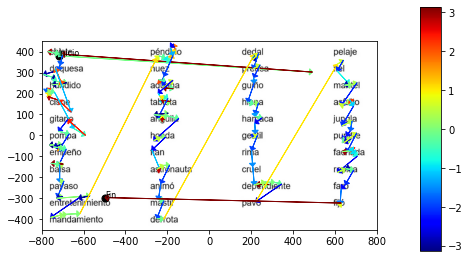

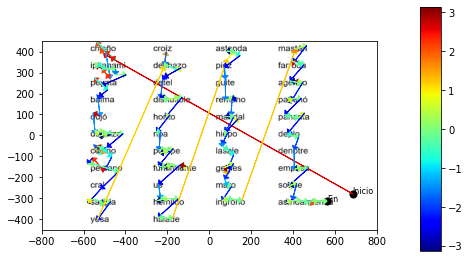

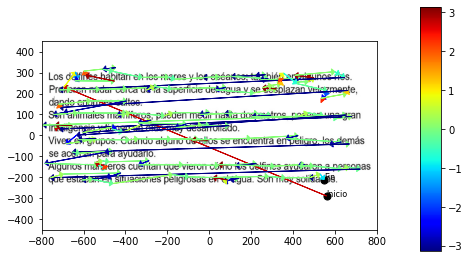

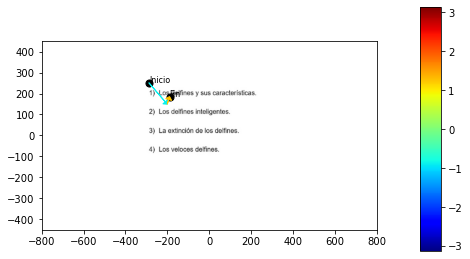

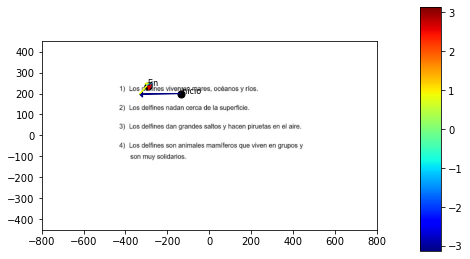

In [41]:
%run funciones_graficos.ipynb

files1=glob.glob(directory_out + 'fix-*.csv')
files2=glob.glob(directory_out + 'datos-*.csv')
files3=glob.glob(directory_out + 'sacadas-*.csv')

kmax=1 #len(files1)
print('\033[91m' + 'Cantidad de archivos que encontró:' + '\033[0m',kmax)
print('\033[91m' + 'Nombres de los archivos:' + '\033[0m',files1)

k=0
for file in files1:
    filename_in=file
            
    fix=pd.read_csv(filename_in)
    fix.reset_index(drop=True)
    ntot_trials=fix["trial"].iloc[-1]
    data=pd.read_csv(files2[k])
    
    for nt in range(ntot_trials):
        ntrial=nt+1
    
        print('\033[91m' + 'Construyendo Graficos para Trial:' + '\033[0m',ntrial)
    
        fix_x=np.array(fix["avg_loc_x"][fix["trial"]==ntrial])
        fix_y=np.array(-fix["avg_loc_y"][fix["trial"]==ntrial])
        fix_xy=np.column_stack((fix_x, fix_y))
        fix_xy[np.isnan(fix_xy)]=0
        nfix=fix_xy.shape[0]
        x=np.array(data["xp"][data["trial"]==ntrial])
        y=(-1)*np.array(data["yp"][data["trial"]==ntrial])
        
        if nfix<=1:
            continue
        plot_sacades(fix_xy,ntrial,filename_in,resx,resy,directory_trials,15,nfix,directory_out)
        #plot_fixations(fix_xy,ntrial,filename_in,resx,resy,directory_trials,15,nfix,directory_out)
        #plot_trajectory(fix_xy,x,y,ntrial,filename_in,resx,resy,directory_trials,15,nfix,directory_out)
        
        
    k=k+1
    if k==kmax:
        break